In [3]:
#Importing the dataset and showing the head
import pandas as pd
titanic_passengers_df = pd.read_csv(r"file:///D:\GoFoProject\GOMYCODECHECKPOINTS\CHECKPOINT3\titanic-passengers.csv",delimiter=';')
titanic_passengers_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [5]:
#some general info about the dataset
titanic_passengers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
#some general info about the dataset
print("NUMBER OF ROWS OF THE DATASET IS = ",len(titanic_passengers_df))
print("NUMBER OF COLUMNS OF THE DATASET IS = ",len(titanic_passengers_df.columns))
print("THE TOTAL NUMBER OF ELEMENTS IN THE DATASET IS= " ,titanic_passengers_df.size)

NUMBER OF ROWS OF THE DATASET IS =  891
NUMBER OF COLUMNS OF THE DATASET IS =  12
THE TOTAL NUMBER OF ELEMENTS IN THE DATASET IS=  10692


In [4]:
#Columns that contain null values
titanic_passengers_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Dropping the less important columns 
titanic_passengers_df=titanic_passengers_df.drop(['Cabin', 'Embarked'], axis=1)
titanic_passengers_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000


In [10]:
titanic_passengers_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
#Replacing the null values in "Age" column with the mean of the column
#All null values are Handled
replaced_value=titanic_passengers_df['Age'].mean()
titanic_passengers_df['Age'].fillna(value=replaced_value, inplace=True)
titanic_passengers_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

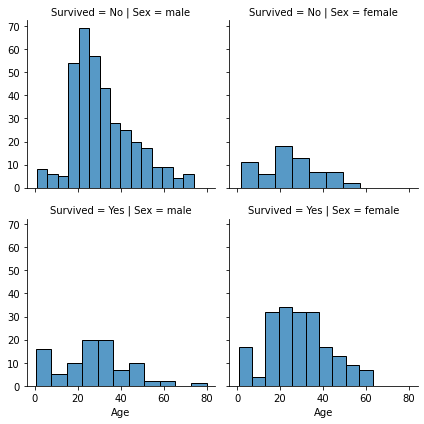

In [21]:
#Visuallizing the correlation between Sex and Age in a plot
#The visualized plot gives us obvious deductions concerning the importance of age and sex in the survival of the individuals.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


titanic_passengers_df= pd.read_csv(r"file:///D:\GoFoProject\GOMYCODECHECKPOINTS\CHECKPOINT3\titanic-passengers.csv",delimiter=';')
#replaced_value=titanic_passengers_df['Age'].mean()
#titanic_passengers_df['Age'].fillna(value=replaced_value, inplace=True)
grid = sns.FacetGrid(titanic_passengers_df, col="Sex",  row="Survived")
grid.map_dataframe(sns.histplot,"Age")

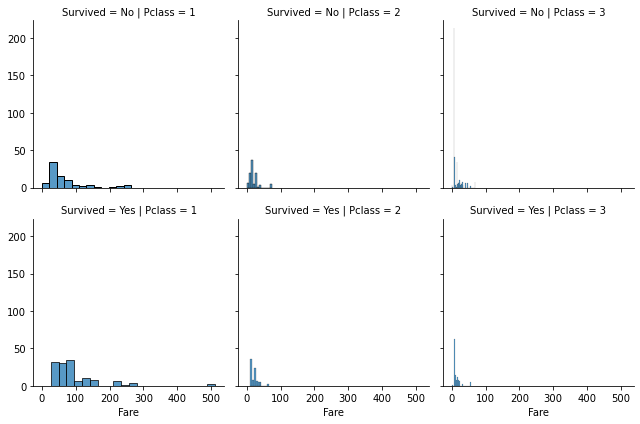

In [13]:
# The impact of Pclass and fare on survival.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_passengers_df = pd.read_csv(r"file:///D:\GoFoProject\GOMYCODECHECKPOINTS\CHECKPOINT3\titanic-passengers.csv",delimiter=';')

grid2 = sns.FacetGrid(titanic_passengers_df, col="Pclass",  row="Survived")
grid2.map_dataframe(sns.histplot,"Fare")

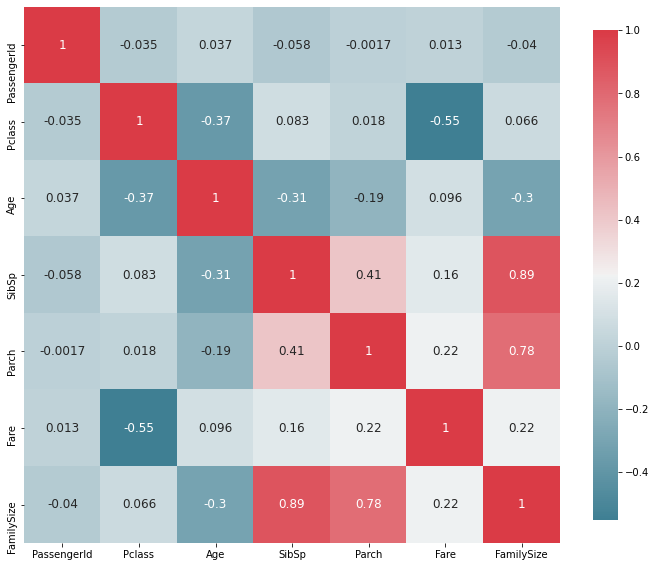

In [34]:
Analysis=  """ This function takes a data frame as an input to calculate the correlation of all columns in the data frame 
 using corr (); ignoring the ones with non-numerical data types and the null values,creating a grid of subplots using subplots()
 ,plotting the correlation using heatmap(): taking corr as data (2D),plotting each cell in the shape of a square
 (square = True ),writing the data value in each cell (annot= True),

"""
def plot_correlation_map( titanic_passengers_df ):

    corr = titanic_passengers_df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( titanic_passengers_df )

In [16]:
#Viewing the relation between Pclass and Survived by groupby function combined with mean() 
titanic_passengers_df[["Survived", "Pclass"]].groupby(["Survived"], as_index=True).mean()

,Pclass
Survived,
No,2.531876
Yes,1.950292


In [22]:
#Creating new column "Title" contains titles of titanic passengers 
import re
titanic_passengers_df['Title'] = titanic_passengers_df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
titanic_passengers_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,Mr
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,Miss
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Mr
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,Miss


In [33]:
#Replacing titles with the ones in the dictionary
Title_Dictionary = {"Capt": "Officer","Col":  "Officer","Major": "Officer","Dr":  "Officer","Rev":  "Officer","Jonkheer": "Royalty","Don": "Royalty","Sir" : "Royalty","Lady" : "Royalty","the Countess": "Royalty","Dona": "Royalty","Mme": "Miss","Mlle": "Miss","Miss" : "Miss","Ms": "Mrs","Mr" : "Mrs","Mrs" : "Mrs","Master" : "Master"}

titanic_passengers_df['Title']=titanic_passengers_df['Title'].replace({"Capt": "Officer","Col":  "Officer","Major": "Officer","Dr":  "Officer","Rev":  "Officer","Jonkheer": "Royalty","Don": "Royalty","Sir" : "Royalty","Lady" : "Royalty","the Countess": "Royalty","Dona": "Royalty","Mme": "Miss","Mlle": "Miss","Miss" : "Miss","Ms": "Mrs","Mr" : "Mrs","Mrs" : "Mrs","Master" : "Master"})

titanic_passengers_df.tail()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title,FamilySize
886,10,Yes,2,female,14.0,1,0,237736,30.0708,Mrs,1
887,61,No,3,male,22.0,0,0,2669,7.2292,Mrs,0
888,535,No,3,female,30.0,0,0,315084,8.6625,Miss,0
889,102,No,3,male,NaN,0,0,349215,7.8958,Mrs,0
890,428,Yes,2,female,19.0,0,0,250655,26.0000,Miss,0


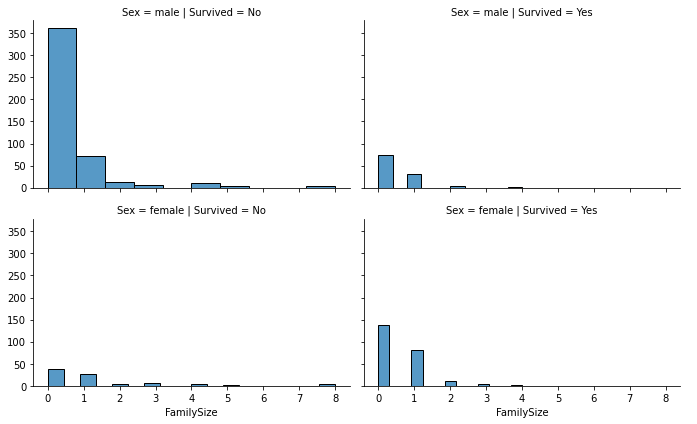

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grid = sns.FacetGrid(titanic_passengers_df, row="Sex", col="Survived",aspect=1.6)

grid.map(sns.histplot, "FamilySize")
grid.add_legend()

Analysis="""
FamilySize can be considered as a useful feature; it's the reusult of combining "Sibsp" which denotes number of siblings, and "Parch"
which denotes number of parents, so it can be used for determining the relation between num of siblings and parents on board directly.
"""

In [38]:
#Creating new feature"FamilySize" by using 2 existing features "SibSp","Parch"
#Dropping some useless columns
#titanic_passengers_df['FamilySize']=titanic_passengers_df['SibSp']+titanic_passengers_df['Parch']
#titanic_passengers_df=titanic_passengers_df.drop(['Cabin', 'Embarked','Name'], axis=1)
titanic_passengers_df['FamilySize']= pd.concat([titanic_passengers_df['SibSp'], titanic_passengers_df['Parch']], axis=1)
titanic_passengers_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title,FamilySize
0,343,No,2,male,28.0,0,0,248740,13.0000,Mrs,0
1,76,No,3,male,25.0,0,0,348123,7.6500,Mrs,0
2,641,No,3,male,20.0,0,0,350050,7.8542,Mrs,0
3,568,No,3,female,29.0,0,4,349909,21.0750,Mrs,0
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,Mrs,1


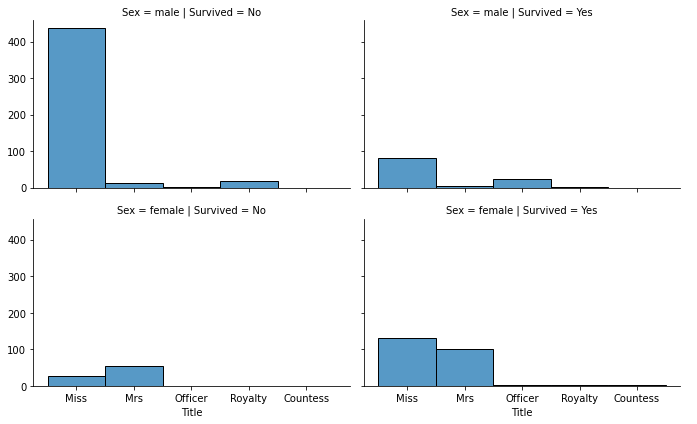

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grid = sns.FacetGrid(titanic_passengers_df, row="Sex", col="Survived",aspect=1.6)

grid.map(sns.histplot, "Title")
grid.add_legend()